# **Data Exploration**

* Tabular Dataset on Lung Cancer: 
https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer

* Image Dataset (CT-Scans) Lung Cancer:
https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/data


## Necessary Imports

In [2]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
#import tarfile
#import urllib
import pandas as pd
#import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Loading Tabular Data

With this code, I load the tabular dataset from a folder into a panda datafame 

In [6]:
LUNG_TABULAR_PATH = os.path.join("datasets", "lung_tabular")

def load_lung_tabular(lung_tabular_path=LUNG_TABULAR_PATH):
    csv_path = os.path.join(lung_tabular_path, "lung_tabular.csv")
    return pd.read_csv(csv_path)

lung_tabular = load_lung_tabular() 

print("Shape of data: ", lung_tabular.shape)
lung_tabular.head() #Display first five rows of the frame


Shape of data:  (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Initial observation: 

There a 16 features in total, one of them is the target class - LUNG_CANCER

Most data, 15 features, is categorical. It is of nominal data type - YES or NO, Male or Female 

Two such featuers are represented using a string ([M,F] for GENDER,[YES,NO] for LUNG_CANCER) 

The other nominal features are have a binary encoding [1,2] for [NO,YES]

There is one attribute, AGE, of type ratio

This dataset has 309 instances

## Initial Analysis of Tabular data

In [7]:
lung_tabular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [10]:
lung_tabular.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

The data has no missing values. Every attribute of the 309 instances has a value.

In [8]:
lung_tabular.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


The range of ages is quite wide, from 21 to 87, however, most of the participant ages are around the age of 62, older adults, which is the age of concern for such a disease. Age distribution needs to be checked.

For the other numerical attributues, the mean value hovers around 1.5-1.6, which is a result of the data being a binary encoding of a [YES,NO] classification.

The mean being 1.5, with the standard deviation being around 0.5 indicates that that there is a relatively balanced distribution between the values of non target attributes. This can be further probed.

Features like SMOKING, WHEEZING, and COUGHING have means closer to 1.6, suggesting a slight skew toward 2 ("Yes") responses in these attributes, which could hint that more participants reported these symptoms or risk factors.

In [11]:
lung_tabular['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

The class distribution for LUNG_CANCER is highly imbalanced, with 270 instances labeled as YES (positive for lung cancer) and only 39 instances labeled as NO (negative for lung cancer). This imbalance may lead to challenges in model training, as most algorithms could be biased towards predicting the majority class. Oversampling may need to be performed to improve model performance.

In [12]:
lung_tabular['GENDER'].value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

The gender spread is quite balanced, indicating the dataset is unbiased in that sense.

## Data Preprocessing 

For further data analysis it will be useful to normalise the data from [1,2] to [0,1], [M,F] to [0,1] and from [NO,YES] to [0,1]. This is important for two reasons: better values for training neural networks and visualising the spread of target attribute.

In [13]:
# Create a copy of the original DataFrame to work with
lung_tabular_binary = lung_tabular.copy()

# Convert categorical values to binary [0, 1]
# Convert GENDER: M = 0, F = 1
lung_tabular_binary['GENDER'] = lung_tabular_binary['GENDER'].replace({'M': 0, 'F': 1})

# Convert LUNG_CANCER: NO = 0, YES = 1
lung_tabular_binary['LUNG_CANCER'] = lung_tabular_binary['LUNG_CANCER'].replace({'NO': 0, 'YES': 1})

# Convert all other features from [1, 2] to [0, 1], NO = 0, YES = 1
for column in lung_tabular_binary.columns:
    if lung_tabular_binary[column].dtype == 'int64' and lung_tabular_binary[column].isin([1, 2]).all():
        lung_tabular_binary[column] = lung_tabular_binary[column] - 1

# Display the first few rows to verify changes
lung_tabular_binary.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


<Axes: >

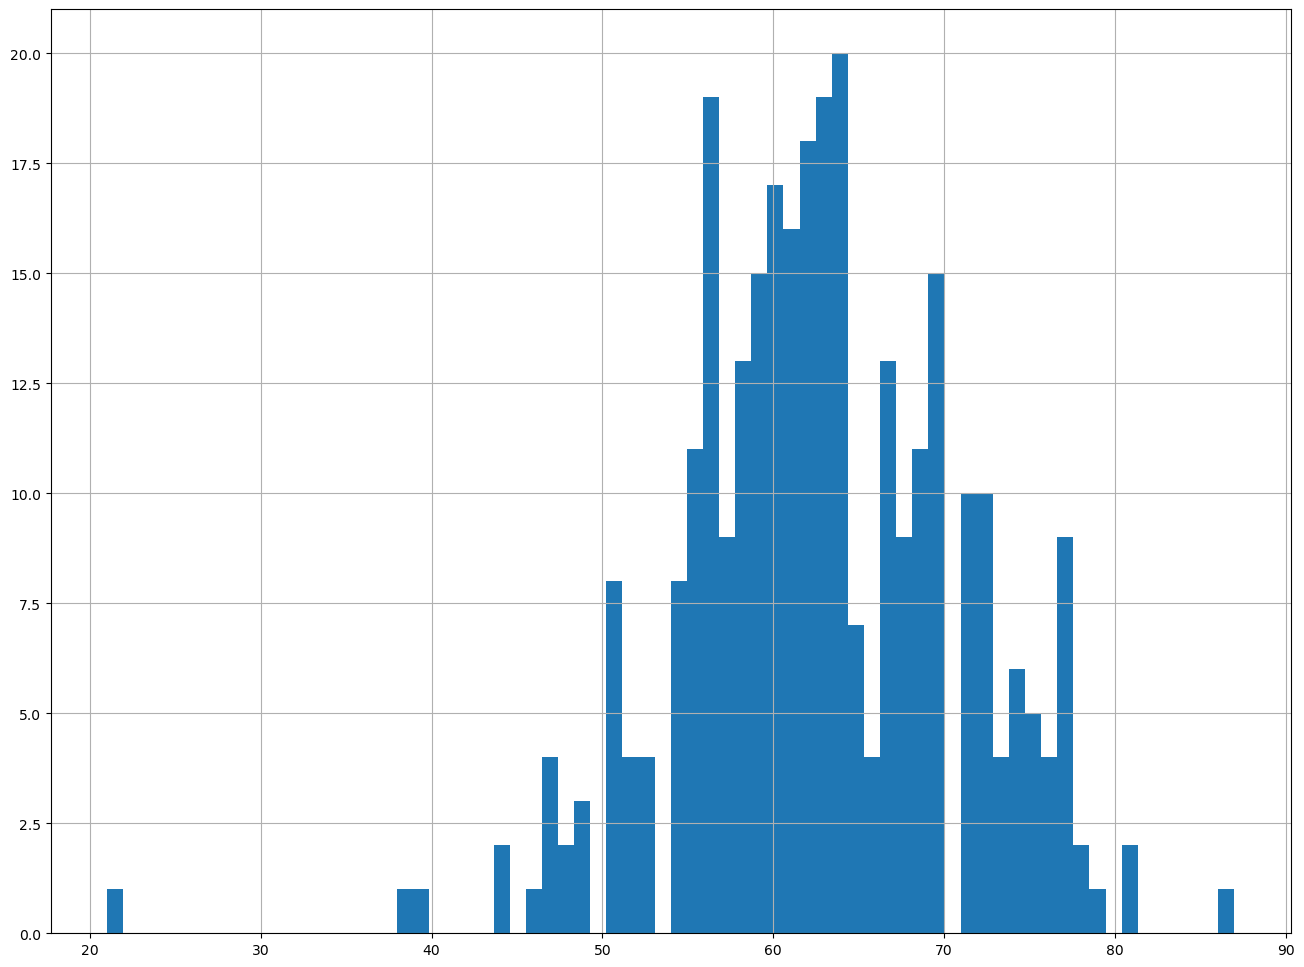

In [17]:
lung_tabular_binary['AGE'].hist(bins=70, figsize=(16,12))

By plotting a histogram of age values, it is clear that most participant ages are betweem 50 and 80, with very few perticipants between ages 40 and 50. 

There is a outlier at the age of 21 and 87. There are also missing values at ages 49, 54 and in particular 71.

There is a particularly high concentration in the 60-65 age range. 

Overall, this looks like a normal distribution with a mean age around 62.


Let's plot a histogram for the binary attributes.

array([[<Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'SMOKING'}>,
        <Axes: title={'center': 'YELLOW_FINGERS'}>,
        <Axes: title={'center': 'ANXIETY'}>],
       [<Axes: title={'center': 'PEER_PRESSURE'}>,
        <Axes: title={'center': 'CHRONIC DISEASE'}>,
        <Axes: title={'center': 'FATIGUE '}>,
        <Axes: title={'center': 'ALLERGY '}>],
       [<Axes: title={'center': 'WHEEZING'}>,
        <Axes: title={'center': 'ALCOHOL CONSUMING'}>,
        <Axes: title={'center': 'COUGHING'}>,
        <Axes: title={'center': 'SHORTNESS OF BREATH'}>],
       [<Axes: title={'center': 'SWALLOWING DIFFICULTY'}>,
        <Axes: title={'center': 'CHEST PAIN'}>,
        <Axes: title={'center': 'LUNG_CANCER'}>, <Axes: >]], dtype=object)

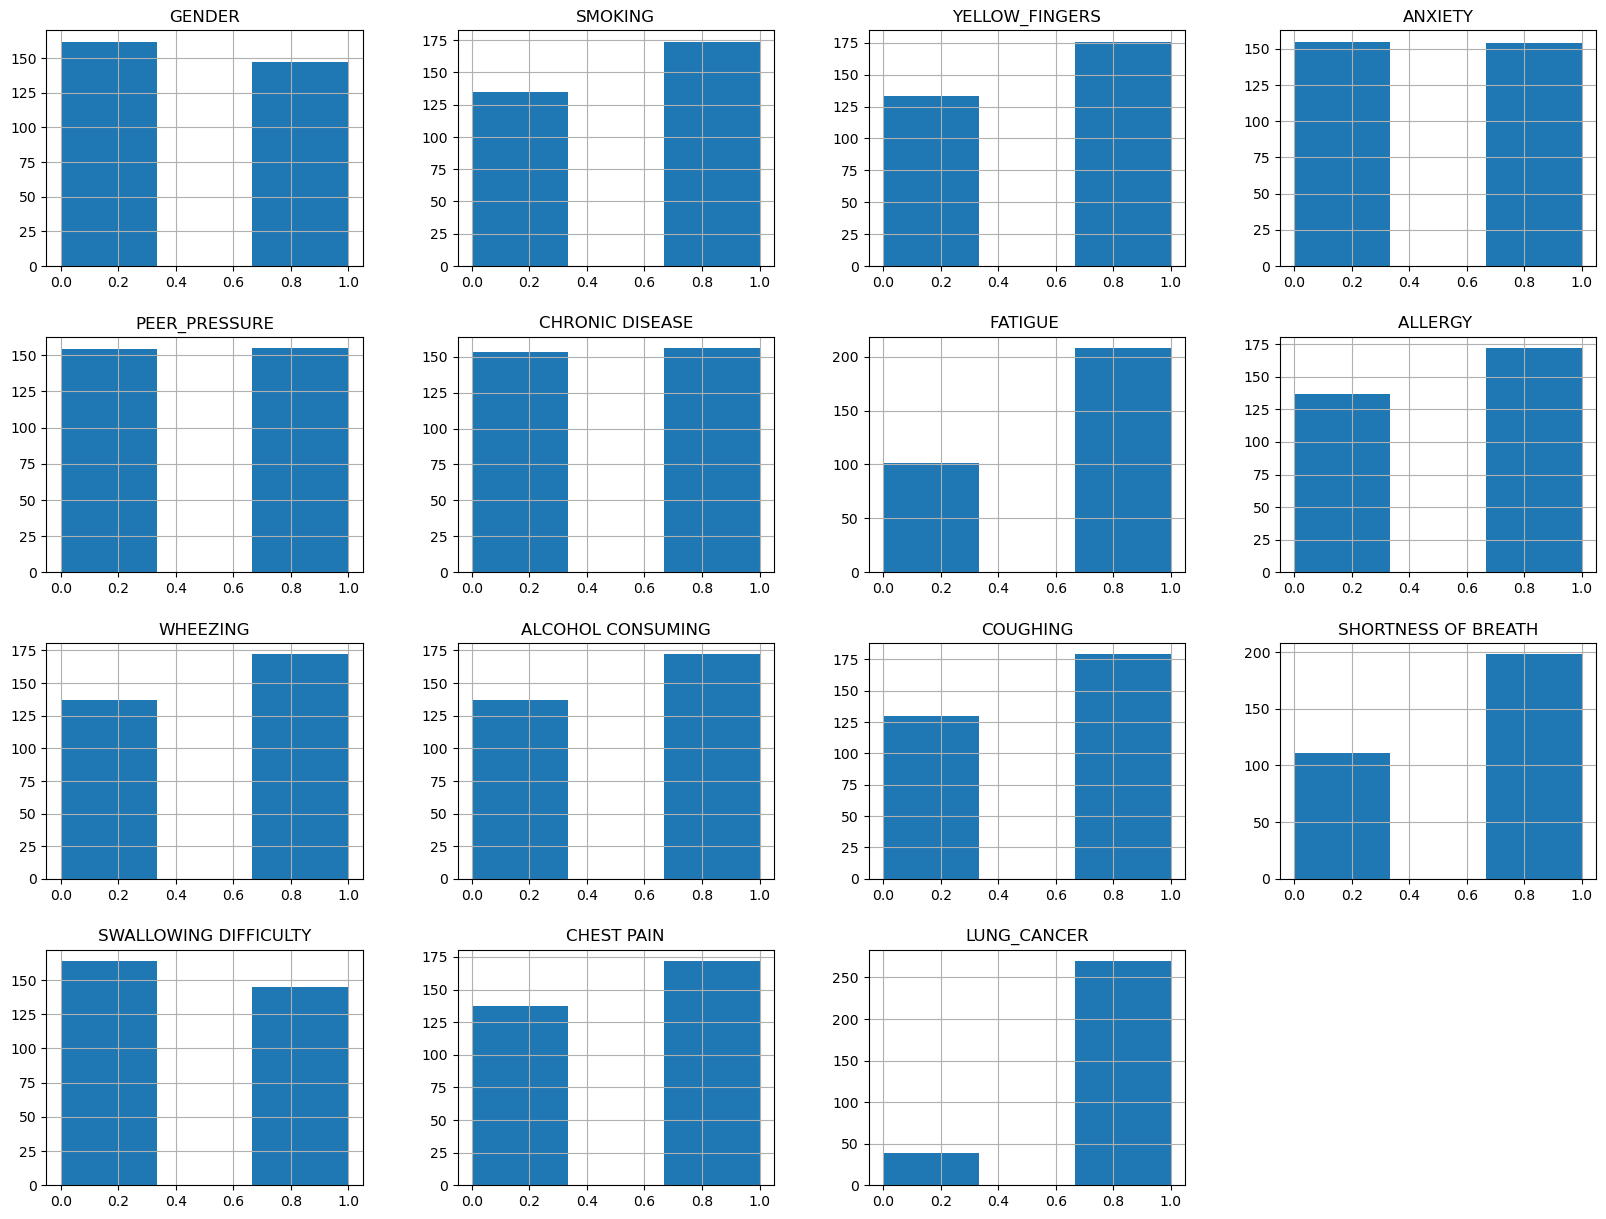

In [18]:
# Select all columns except 'AGE'
lung_tabular_binary_excl_age = lung_tabular_binary.drop(columns=['AGE'])

# Plot histograms for all selected columns
lung_tabular_binary_excl_age.hist(figsize=(20, 15), bins=3)


Features like GENDER, ANXIETY, PEER_PRESSURE, CHRONIC DISEASE, WHEEZING, and SWALLOWING DIFFICULTY appear to be relatively balanced between the two categories (0 and 1), with counts close to 150 for each category

On the other hand, SMOKING, YELLOW_FINGERS, FATIGUE, ALLERGY, COUGHING, SHORTNESS OF BREATH, ALCOHOL CONSUMING, and CHEST PAIN show a noticeable imbalance, with one category being more prevalent than the other.

The LUNG_CANCER feature is highly imbalanced, with a significant majority labeled as 1 (positive for lung cancer). This confirms the earlier observation of class imbalance, which may need addressing in modeling.

FATIGUE and SHORTNESS OF BREATH have the most noticable imbalance, with the majority of patients in this dataset having these symptoms, possibly making the correlate with having LUNG CANCER.